<a href="https://colab.research.google.com/github/M0n1ka-05/Credit_Card_Default_Prediction/blob/main/Monika_Shinde_Team_3_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

sns.set(rc={'figure.figsize':(15,10)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/dat/default of credit card clients.xls'
df = pd.read_excel(path,header=1)

In [ ]:
df1 = pd.read_excel(path)

In [ ]:
df1.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_sept', 'PAY_aug', 'PAY_jul', 'PAY_jun',
       'PAY_may', 'PAY_apr', 'BILL_AMT_sept', 'BILL_AMT_aug', 'BILL_AMT_jul', 'BILL_AMT_jun', 'BILL_AMT_may', 'BILL_AMT_apr', 'PAY_AMT_sept',
'PAY_AMT_aug',
'PAY_AMT_jul',
'PAY_AMT_jun',
'PAY_AMT_may',
'PAY_AMT_apr',
       'DEFAULTER']

In [ ]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,BILL_AMT_sept,BILL_AMT_aug,BILL_AMT_jul,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,DEFAULTER
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
df.isna().sum()

ID               0
LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_sept         0
PAY_aug          0
PAY_jul          0
PAY_jun          0
PAY_may          0
PAY_apr          0
BILL_AMT_sept    0
BILL_AMT_aug     0
BILL_AMT_jul     0
BILL_AMT_jun     0
BILL_AMT_may     0
BILL_AMT_apr     0
PAY_AMT_sept     0
PAY_AMT_aug      0
PAY_AMT_jul      0
PAY_AMT_jun      0
PAY_AMT_may      0
PAY_AMT_apr      0
DEFAULTER        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_sept       30000 non-null  int64
 7   PAY_aug        30000 non-null  int64
 8   PAY_jul        30000 non-null  int64
 9   PAY_jun        30000 non-null  int64
 10  PAY_may        30000 non-null  int64
 11  PAY_apr        30000 non-null  int64
 12  BILL_AMT_sept  30000 non-null  int64
 13  BILL_AMT_aug   30000 non-null  int64
 14  BILL_AMT_jul   30000 non-null  int64
 15  BILL_AMT_jun   30000 non-null  int64
 16  BILL_AMT_may   30000 non-null  int64
 17  BILL_AMT_apr   30000 non-null  int64
 18  PAY_AMT_sept   30000 non-null  int64
 19  PAY_

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,BILL_AMT_sept,BILL_AMT_aug,BILL_AMT_jul,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,DEFAULTER
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# **What is Default?**

**Default** is to fail to make a payment on a debt by the due date. If this happens with a credit card, creditors might raise interest rates to the default (or penalty rate) or decrease the line of credit. In case of serious delinquency, the card issuer can even take legal action to enforce payment or to garnish wages.

### **Dependent variable Analysis**

In [ ]:
df['DEFAULTER'].value_counts()

0    23364
1     6636
Name: DEFAULTER, dtype: int64

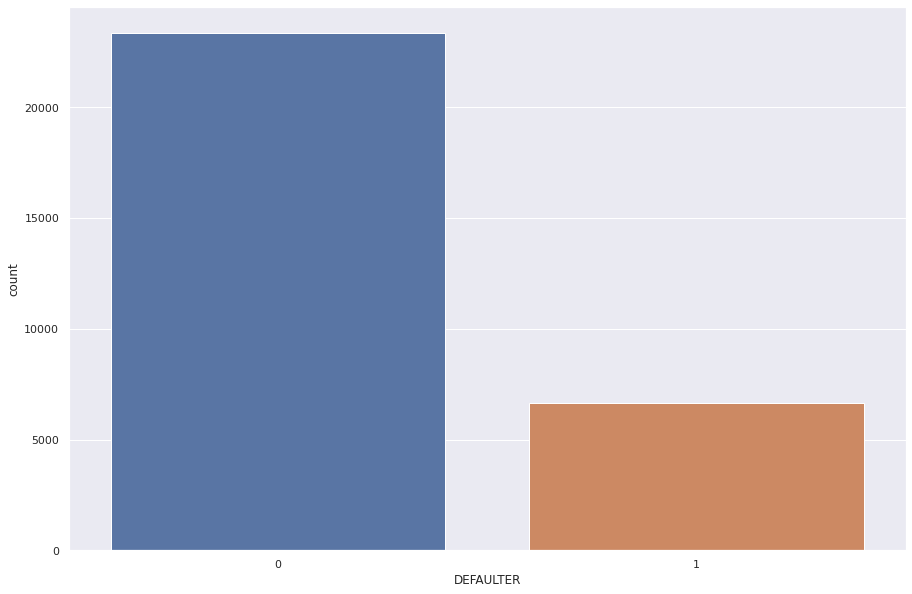

In [ ]:
sns.countplot(df['DEFAULTER'])

From above plot , we can see that we have imbalanced dataset. We will use some technique to make it balanced before modelling.

### **Independent Variable Analysis**

**SEX**



*   1 - Male
*   2 - Female



In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

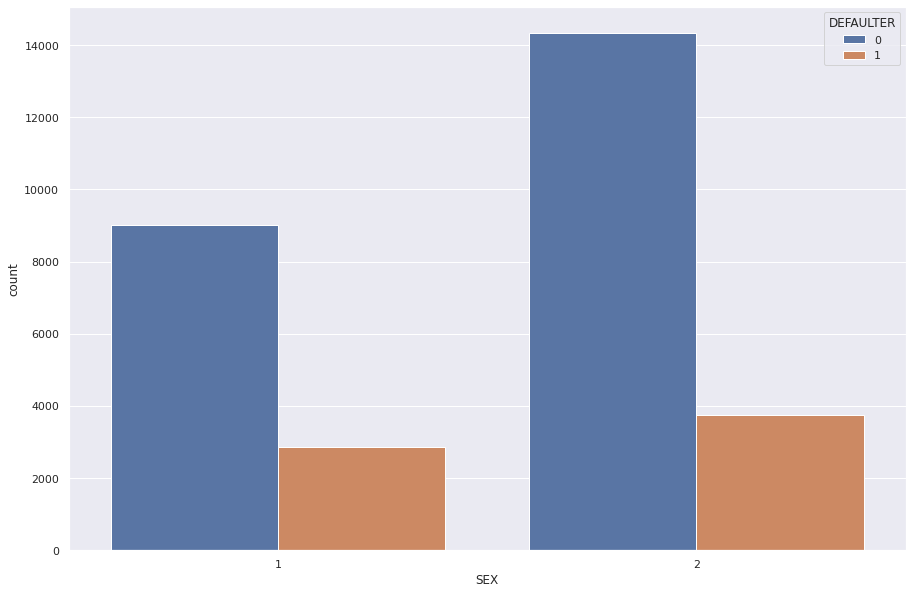

In [ ]:
sns.countplot(x='SEX', data= df, hue='DEFAULTER')

**Education**



> 1 = graduate school; 2 = university; 3 = high school; 4 = others


In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [ ]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

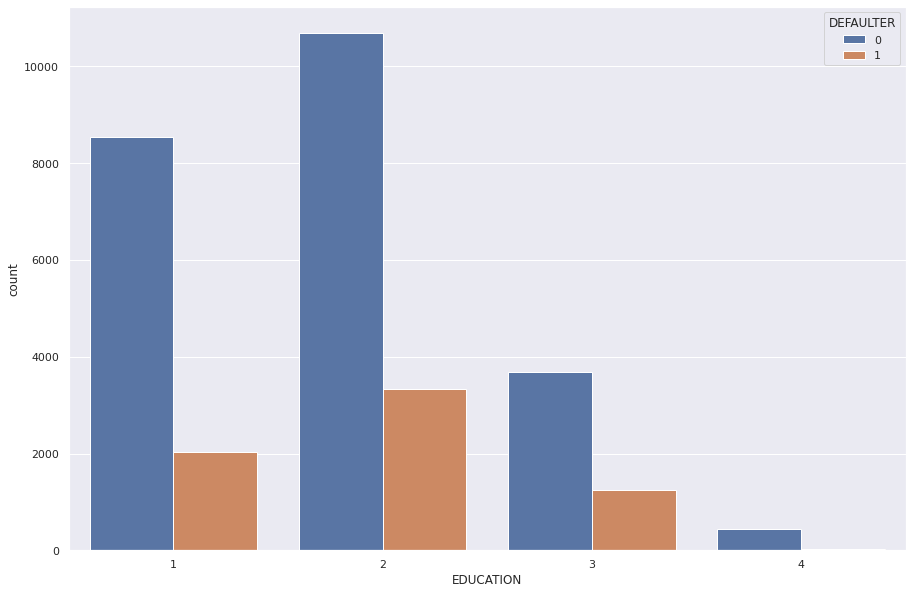

In [ ]:
sns.countplot(x='EDUCATION', data= df, hue='DEFAULTER')


**AGE**

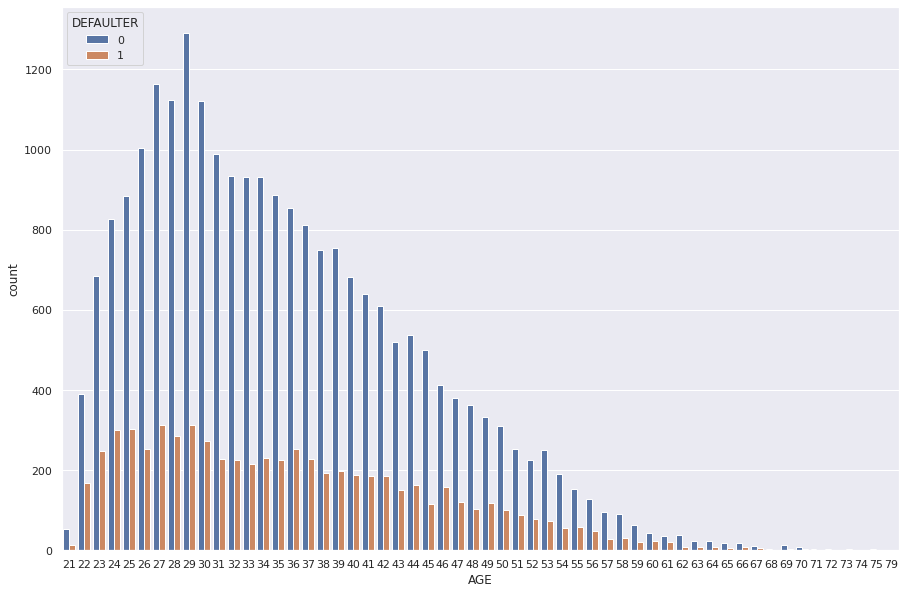

In [ ]:
sns.countplot(x='AGE', data= df, hue='DEFAULTER')
#sns.histplot(x='AGE', data= df)

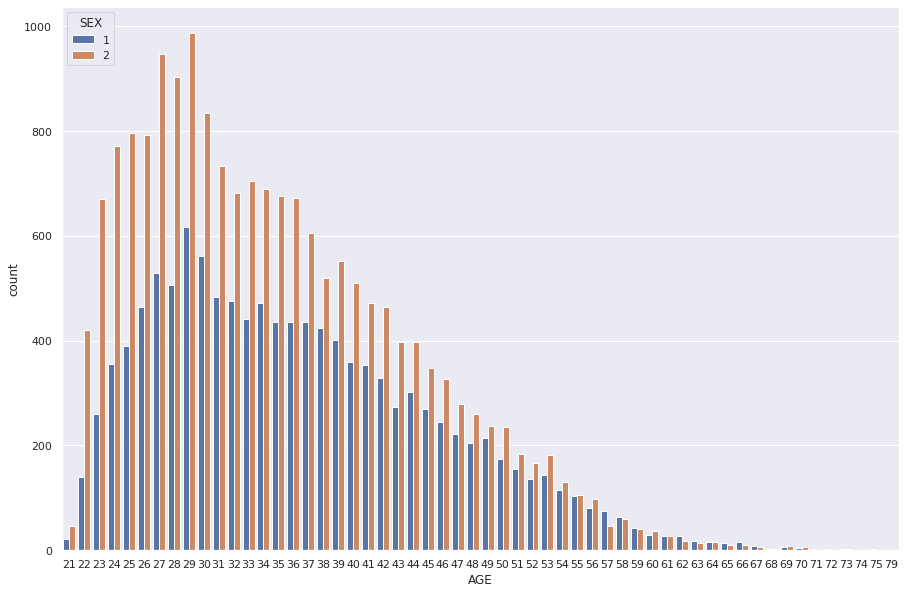

In [ ]:
sns.countplot(x='AGE', data= df, hue='SEX')

**Marriage**


> 1 = married; 2 = single; 3 = others



In [ ]:
df['MARRIAGE'].value_counts()


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [ ]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

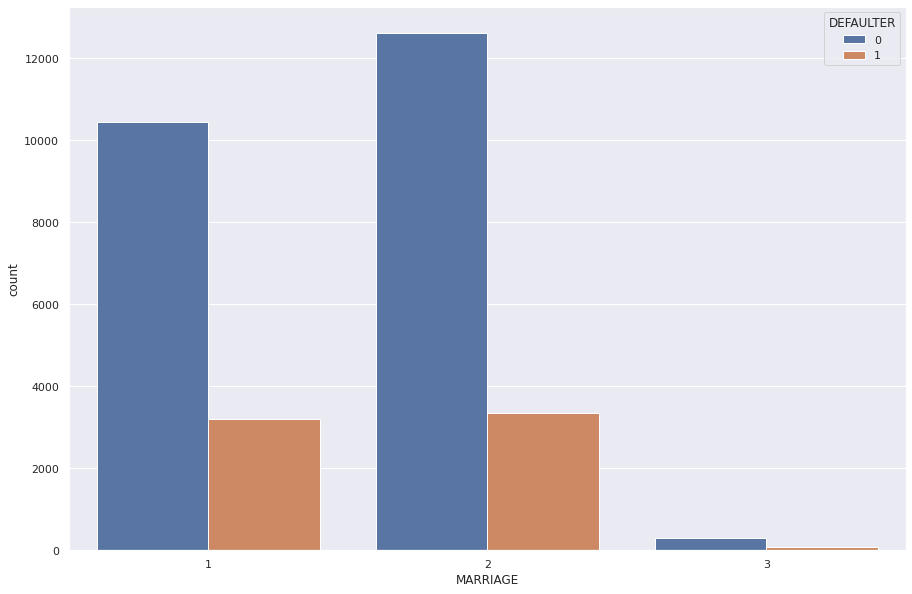

In [ ]:
sns.countplot(x='MARRIAGE', data= df, hue='DEFAULTER')

**Limit Bal**

In [ ]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

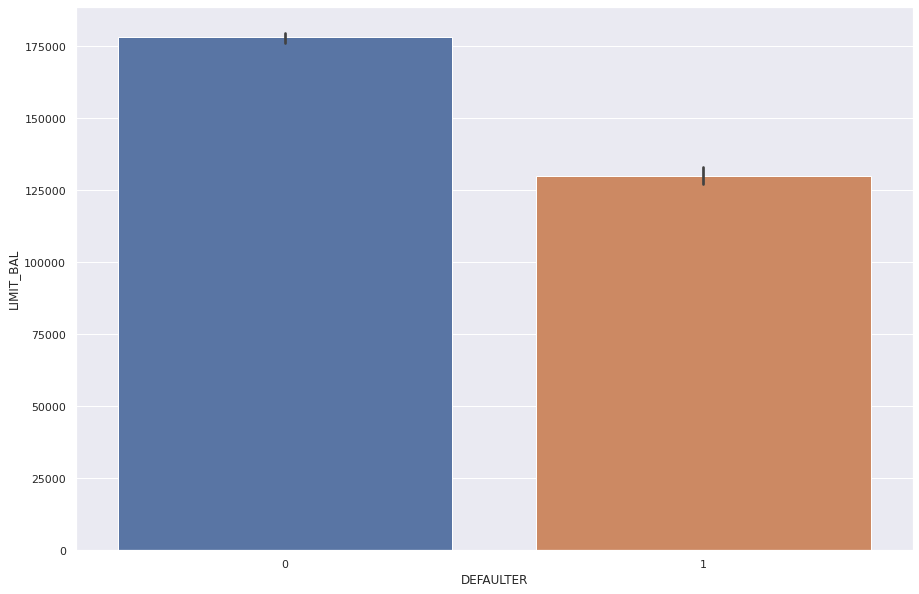

In [ ]:
#sns.countplot(x='LIMIT_BAL', data= df, hue='DEFAULTER')
sns.barplot(x='DEFAULTER', y='LIMIT_BAL', data=df)

**PAY_sept - PAY_apr are the columns whoich shows history of past payment for customer. Lets analysis them.**

  

*   0  -  (have to determine)
*  -1  -  paid on time
*  -2  -  (have to determine)
*   2  -  2 month delay
*   3  -   3 month delay
*   4  -   4 month delay
*   5  -   5 month delay
*   6  -   6 month delay
*   7  -   7 month delay
*   8  -   8 month delay
  
   

   
   
   
   
   



In [ ]:
df['PAY_apr'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_apr, dtype: int64

In [ ]:
df[df['PAY_sept'] == -2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,BILL_AMT_sept,BILL_AMT_aug,BILL_AMT_jul,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,DEFAULTER
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
23,24,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1
33,34,500000,2,2,1,54,-2,-2,-2,-2,-2,-2,10929,4152,22722,7521,71439,8981,4152,22827,7521,71439,981,51582,0
34,35,500000,1,1,1,58,-2,-2,-2,-2,-2,-2,13709,5006,31130,3180,0,5293,5006,31178,3180,0,5293,768,0
45,46,210000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29946,29947,230000,1,1,2,44,-2,-1,-1,-1,-1,-1,5419,3288,806,1467,9192,4388,3306,806,1500,9216,4388,0,0
29961,29962,260000,1,1,2,33,-2,-2,-2,-2,-2,-2,0,263,0,1368,101,955,263,0,1368,101,955,0,0
29979,29980,180000,1,1,1,32,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
29983,29984,20000,1,2,1,44,-2,-2,-2,-2,-2,-2,1822,2872,2712,2882,9235,1719,2890,2720,2890,9263,1824,1701,0


In [ ]:
df[df['PAY_AMT_apr'] == df['BILL_AMT_apr']].head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,BILL_AMT_sept,BILL_AMT_aug,BILL_AMT_jul,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,DEFAULTER
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
18,19,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
19,20,180000,2,1,2,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
38,39,50000,1,1,2,25,1,-1,-1,-2,-2,-2,0,780,0,0,0,0,780,0,0,0,0,0,1
45,46,210000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df[df['ID'] == 24]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,BILL_AMT_sept,BILL_AMT_aug,BILL_AMT_jul,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,DEFAULTER
23,24,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1


In [ ]:
df['Bill_Amnt'] = df[['BILL_AMT_sept'	,'BILL_AMT_aug',	'BILL_AMT_jul',	'BILL_AMT_jun',	'BILL_AMT_may',	'BILL_AMT_apr',	'PAY_AMT_sept']].sum(axis=1)

In [ ]:
df['Paid_Amnt'] = df[['PAY_AMT_sept',	'PAY_AMT_aug',	'PAY_AMT_jul',	'PAY_AMT_jun',	'PAY_AMT_may',	'PAY_AMT_apr']].sum(axis=1)

In [ ]:
df['diff_amnt'] = df['Bill_Amnt'] - df['Paid_Amnt']

In [ ]:
df['pay_dummy'] =df[['PAY_sept'	,'PAY_aug'	,'PAY_jul'	,'PAY_jun',	'PAY_may',	'PAY_apr']].sum(axis=1)

In [ ]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,BILL_AMT_sept,BILL_AMT_aug,BILL_AMT_jul,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,DEFAULTER,Bill_Amnt,Paid_Amnt,diff_amnt,pay_dummy
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,-2
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,3
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,103171,11018,92153,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,233334,8388,224946,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,111339,59049,52290,-2
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,240614,7772,232842,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,2779595,180759,2598836,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,13866,4791,9075,-3
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,68541,6761,61780,2
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,26919,14129,12790,-10


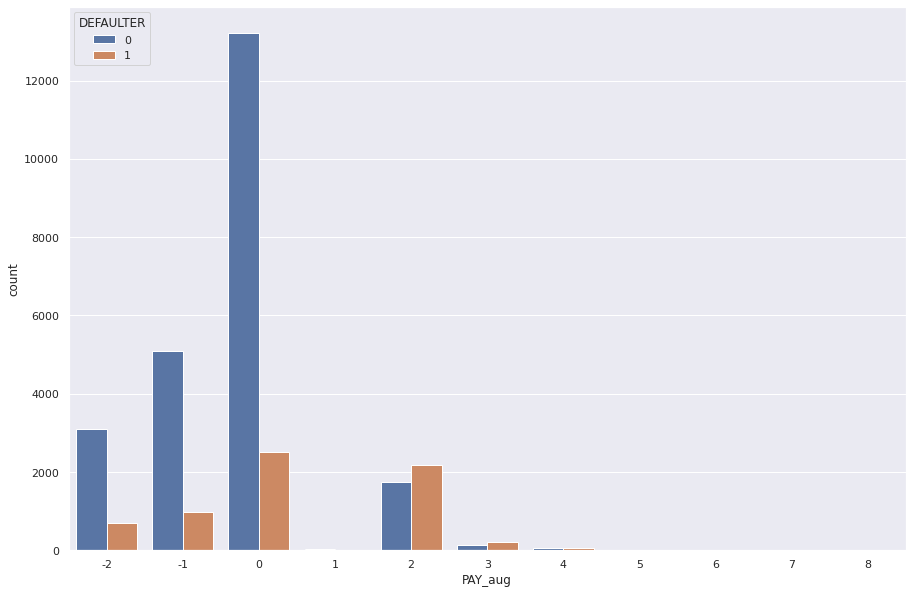

In [ ]:
sns.countplot(x = 'PAY_aug', hue = 'DEFAULTER', data = df)

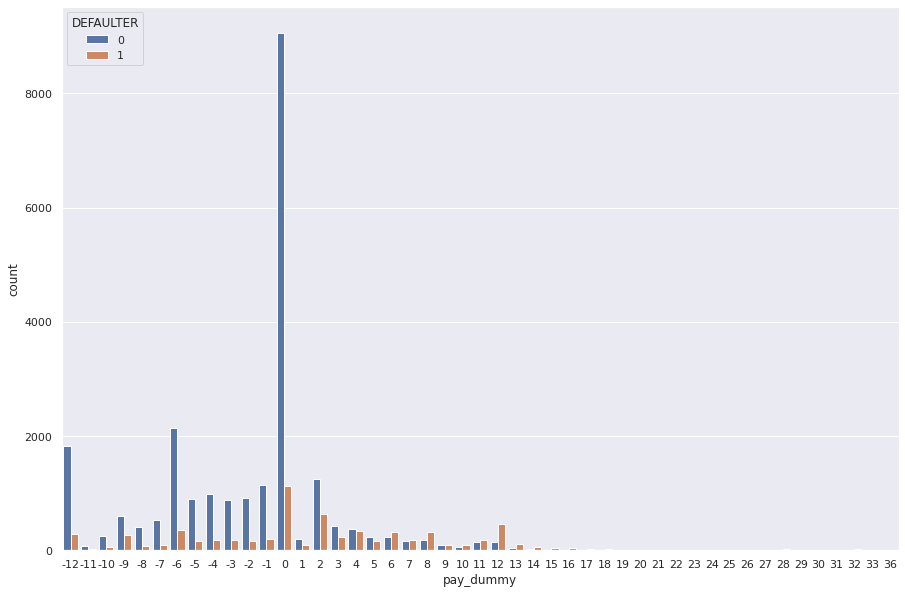

In [ ]:
sns.countplot(x='pay_dummy', data = df, hue = 'DEFAULTER')

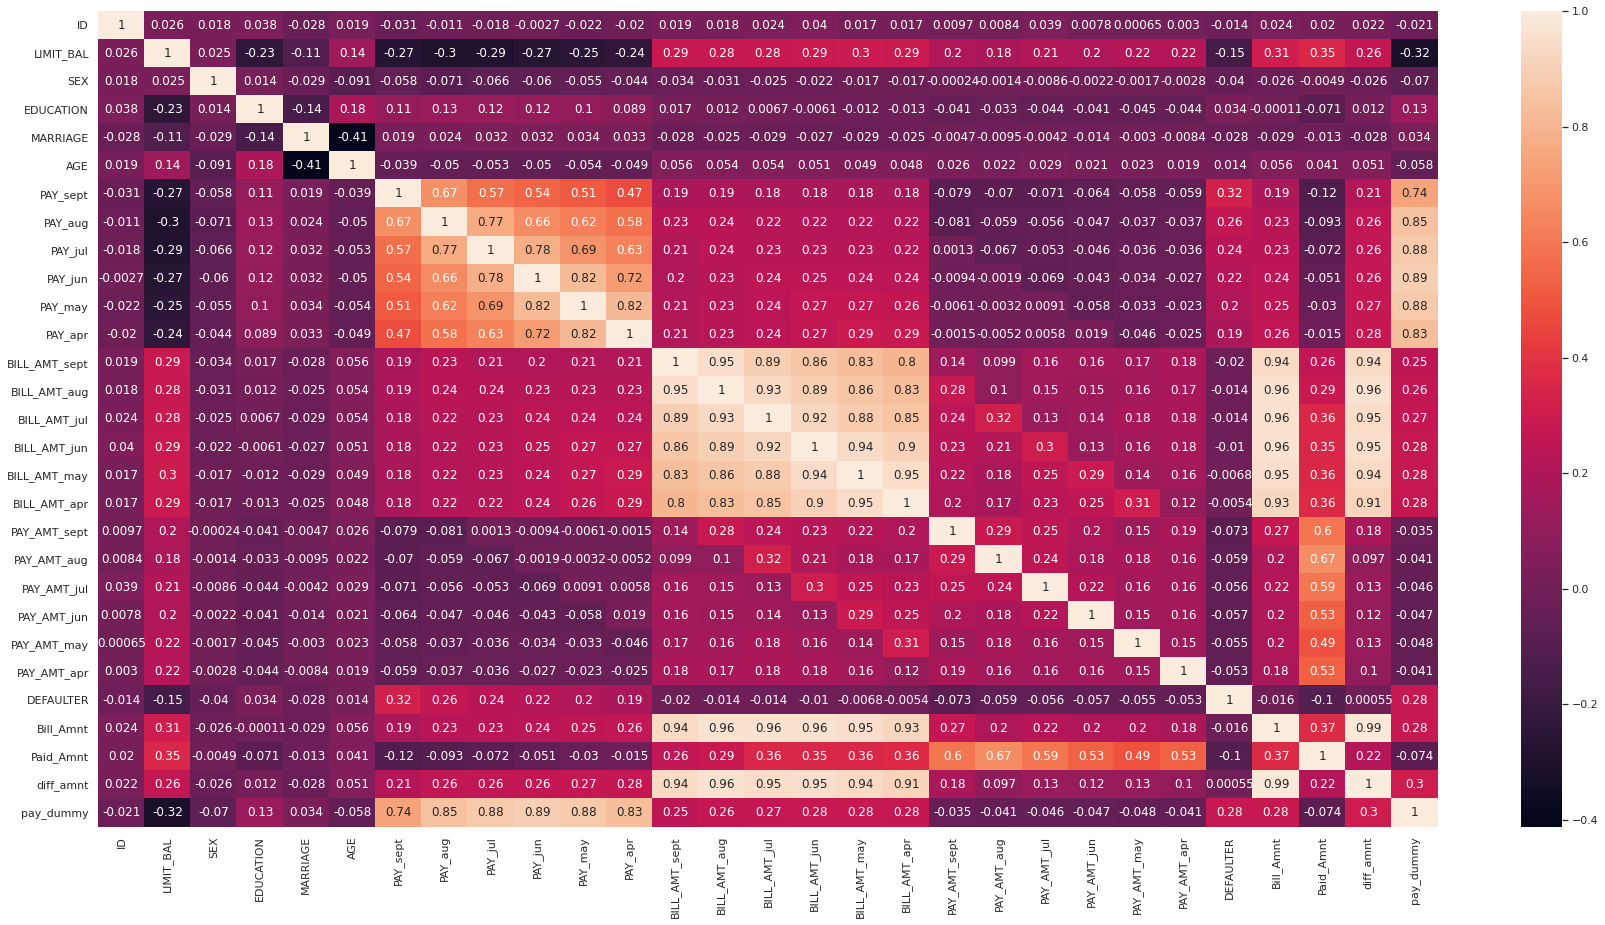

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot = True)

In [ ]:
new_df = df

In [ ]:
#one hot encoding

new_df = pd.get_dummies(new_df, columns=['SEX' ,'EDUCATION', 'MARRIAGE' , 'PAY_sept',	'PAY_aug',	'PAY_jul'	,'PAY_jun',	'PAY_may',	'PAY_apr'	], prefix=['SEX' ,'EDU', 'Marriage' , 'PAY_sept',	'PAY_aug',	'PAY_jul'	,'PAY_jun',	'PAY_may',	'PAY_apr'] )

In [ ]:
new_df.head(5)

,ID,LIMIT_BAL,AGE,BILL_AMT_sept,BILL_AMT_aug,BILL_AMT_jul,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,DEFAULTER,Bill_Amnt,Paid_Amnt,diff_amnt,pay_dummy,SEX_1,SEX_2,EDU_1,EDU_2,EDU_3,EDU_4,Marriage_1,Marriage_2,Marriage_3,PAY_sept_-2,PAY_sept_-1,PAY_sept_0,PAY_sept_1,PAY_sept_2,PAY_sept_3,PAY_sept_4,PAY_sept_5,PAY_sept_6,PAY_sept_7,PAY_sept_8,...,PAY_jul_0,PAY_jul_1,PAY_jul_2,PAY_jul_3,PAY_jul_4,PAY_jul_5,PAY_jul_6,PAY_jul_7,PAY_jul_8,PAY_jun_-2,PAY_jun_-1,PAY_jun_0,PAY_jun_1,PAY_jun_2,PAY_jun_3,PAY_jun_4,PAY_jun_5,PAY_jun_6,PAY_jun_7,PAY_jun_8,PAY_may_-2,PAY_may_-1,PAY_may_0,PAY_may_2,PAY_may_3,PAY_may_4,PAY_may_5,PAY_may_6,PAY_may_7,PAY_may_8,PAY_apr_-2,PAY_apr_-1,PAY_apr_0,PAY_apr_2,PAY_apr_3,PAY_apr_4,PAY_apr_5,PAY_apr_6,PAY_apr_7,PAY_apr_8
0,1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,-2,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,3,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,103171,11018,92153,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,233334,8388,224946,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,111339,59049,52290,-2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score 

import pickle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = new_df.drop(['ID','DEFAULTER'], axis=1)
y = new_df['DEFAULTER']

In [ ]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
parameters = lr.coef_


In [ ]:
# save the model to disk
filename = 'lr_model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8182666666666667


In [ ]:
confusion_matrix(y_test, y_pred)

array([[5587,  286],
       [1077,  550]])

In [ ]:
print(classification_report(y_test, y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.34      0.45      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500



In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5873
           1       0.61      0.20      0.31      1627

    accuracy                           0.80      7500
   macro avg       0.71      0.58      0.59      7500
weighted avg       0.77      0.80      0.76      7500



In [ ]:
#SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5664  209]
 [1294  333]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5873
           1       0.61      0.20      0.31      1627

    accuracy                           0.80      7500
   macro avg       0.71      0.58      0.59      7500
weighted avg       0.77      0.80      0.76      7500



### **Using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
parameters = lr.coef_

In [ ]:
confusion_matrix(y_test, y_pred)

array([[4828, 1045],
       [ 671,  956]])

In [ ]:
print(classification_report(y_test, y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5873
           1       0.48      0.59      0.53      1627

    accuracy                           0.77      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.77      0.78      7500



In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_SMOTE, y_train_SMOTE)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.806


In [ ]:
#SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_SMOTE, y_train_SMOTE)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5607  266]
 [1189  438]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5873
           1       0.62      0.27      0.38      1627

    accuracy                           0.81      7500
   macro avg       0.72      0.61      0.63      7500
weighted avg       0.78      0.81      0.77      7500



### **Trying with modified dataset, by removing few highly correlated features.**

In [ ]:
new_df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT_sept', 'BILL_AMT_aug',
       'BILL_AMT_jul', 'BILL_AMT_jun', 'BILL_AMT_may', 'BILL_AMT_apr',
       'PAY_AMT_sept', 'PAY_AMT_aug', 'PAY_AMT_jul', 'PAY_AMT_jun',
       'PAY_AMT_may', 'PAY_AMT_apr', 'DEFAULTER', 'Bill_Amnt', 'Paid_Amnt',
       'diff_amnt', 'pay_dummy', 'SEX_1', 'SEX_2', 'EDU_1', 'EDU_2', 'EDU_3',
       'EDU_4', 'Marriage_1', 'Marriage_2', 'Marriage_3', 'PAY_sept_-2',
       'PAY_sept_-1', 'PAY_sept_0', 'PAY_sept_1', 'PAY_sept_2', 'PAY_sept_3',
       'PAY_sept_4', 'PAY_sept_5', 'PAY_sept_6', 'PAY_sept_7', 'PAY_sept_8',
       'PAY_aug_-2', 'PAY_aug_-1', 'PAY_aug_0', 'PAY_aug_1', 'PAY_aug_2',
       'PAY_aug_3', 'PAY_aug_4', 'PAY_aug_5', 'PAY_aug_6', 'PAY_aug_7',
       'PAY_aug_8', 'PAY_jul_-2', 'PAY_jul_-1', 'PAY_jul_0', 'PAY_jul_1',
       'PAY_jul_2', 'PAY_jul_3', 'PAY_jul_4', 'PAY_jul_5', 'PAY_jul_6',
       'PAY_jul_7', 'PAY_jul_8', 'PAY_jun_-2', 'PAY_jun_-1', 'PAY_jun_0',
       'PAY_jun_1', 'PAY_jun_2', 'PAY_jun_3', '

In [ ]:
mod_df = df.drop(['BILL_AMT_sept',
       'BILL_AMT_aug', 'BILL_AMT_jul', 'BILL_AMT_jun', 'BILL_AMT_may',
       'BILL_AMT_apr', 'PAY_AMT_sept', 'PAY_AMT_aug', 'PAY_AMT_jul',
       'PAY_AMT_jun', 'PAY_AMT_may', 'PAY_AMT_apr','pay_dummy'], axis =1)

In [ ]:
mod_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_sept',
       'PAY_aug', 'PAY_jul', 'PAY_jun', 'PAY_may', 'PAY_apr', 'DEFAULTER',
       'Bill_Amnt', 'Paid_Amnt', 'diff_amnt'],
      dtype='object')

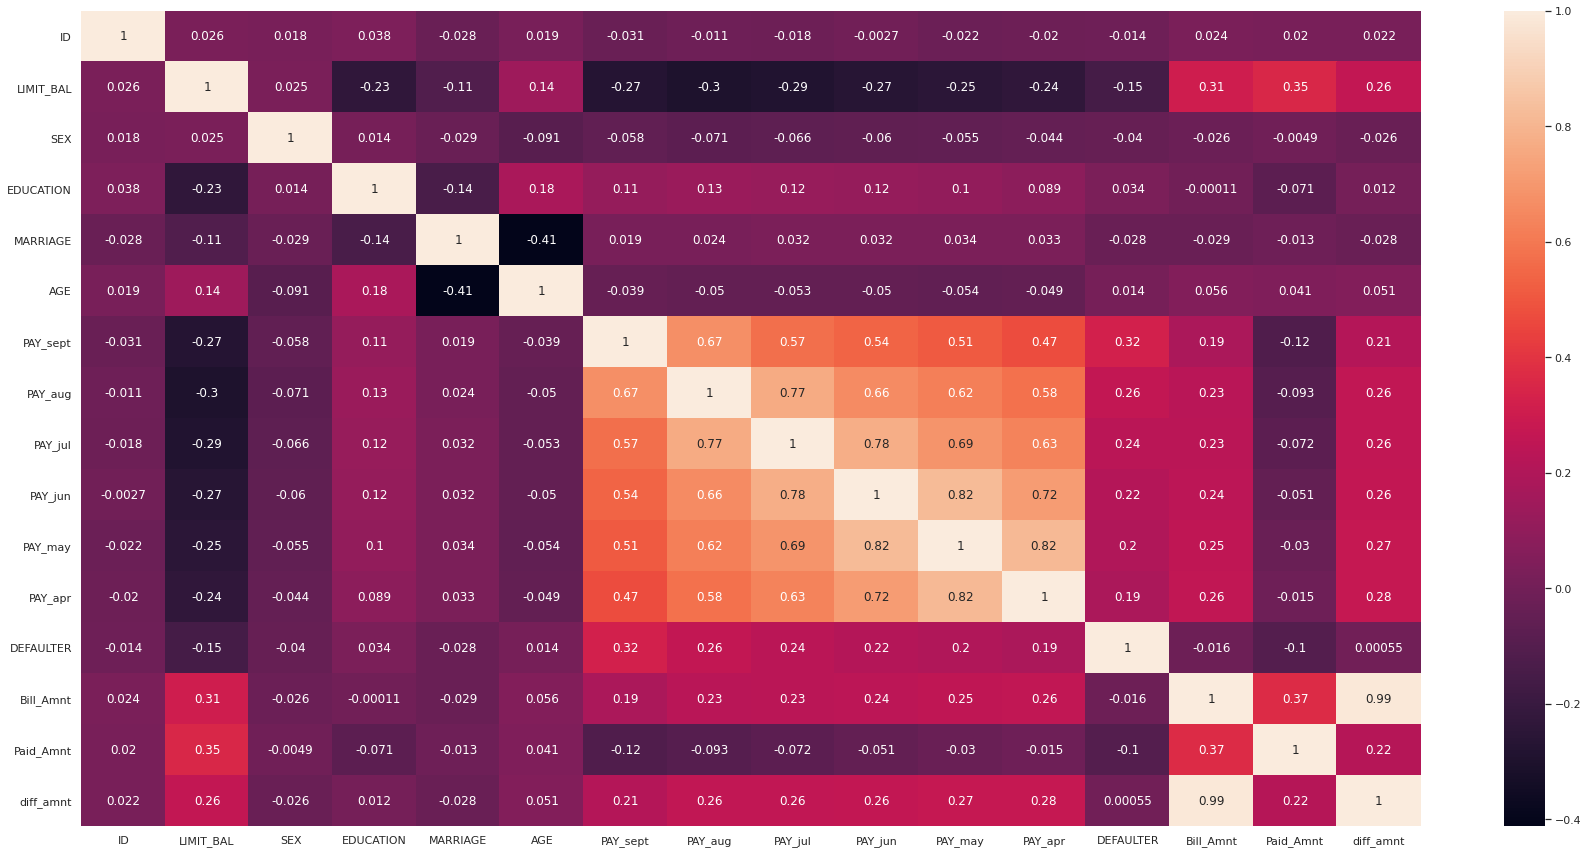

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(mod_df.corr(), annot= True)

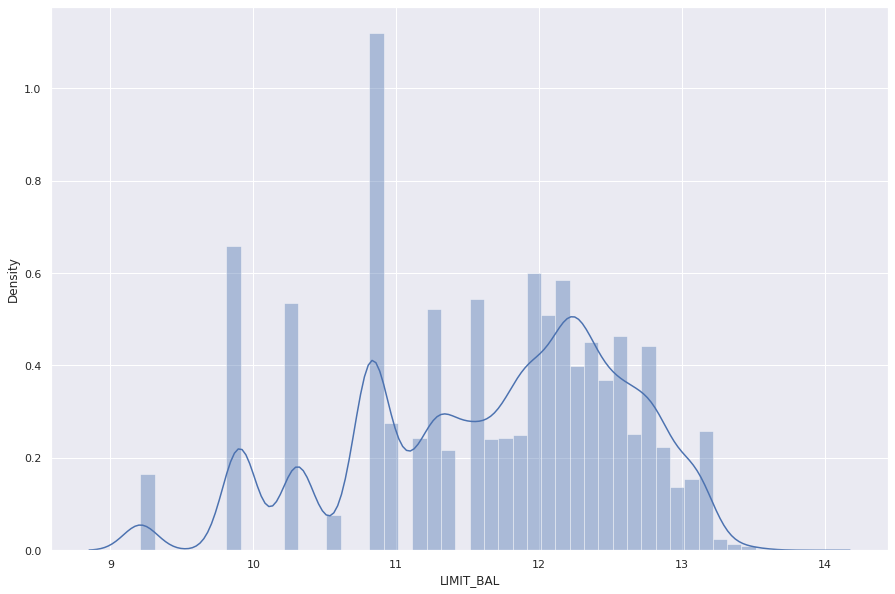

In [ ]:
sns.distplot(np.log(mod_df['LIMIT_BAL']))

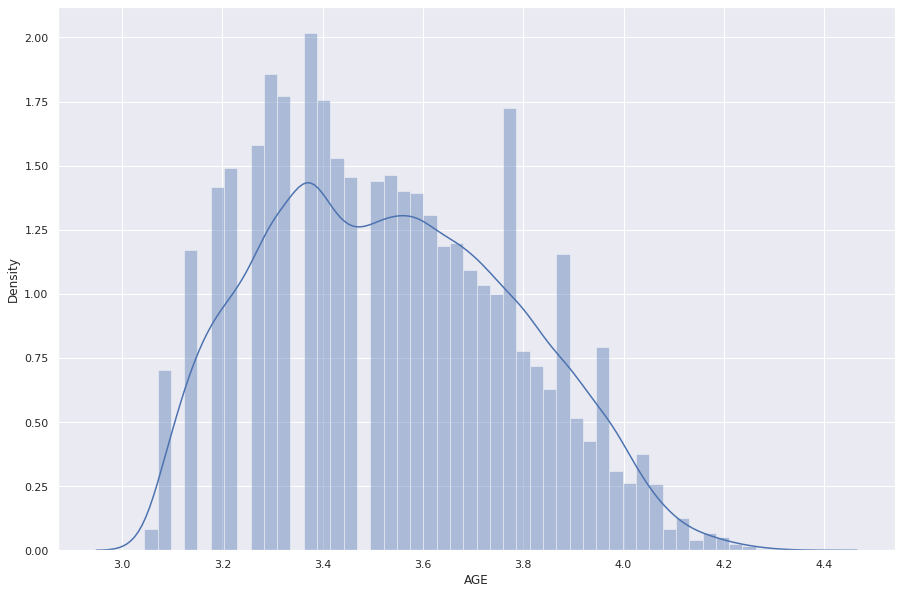

In [ ]:
sns.distplot(np.log(mod_df['AGE']))



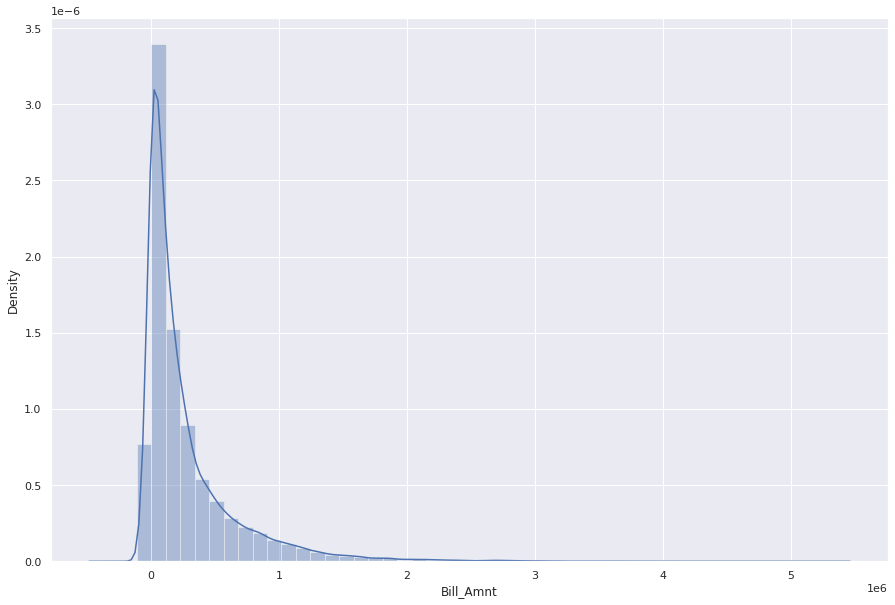

In [ ]:
#sns.distplot(np.log(mod_df['Bill_Amnt']))
sns.distplot(mod_df['Bill_Amnt'])

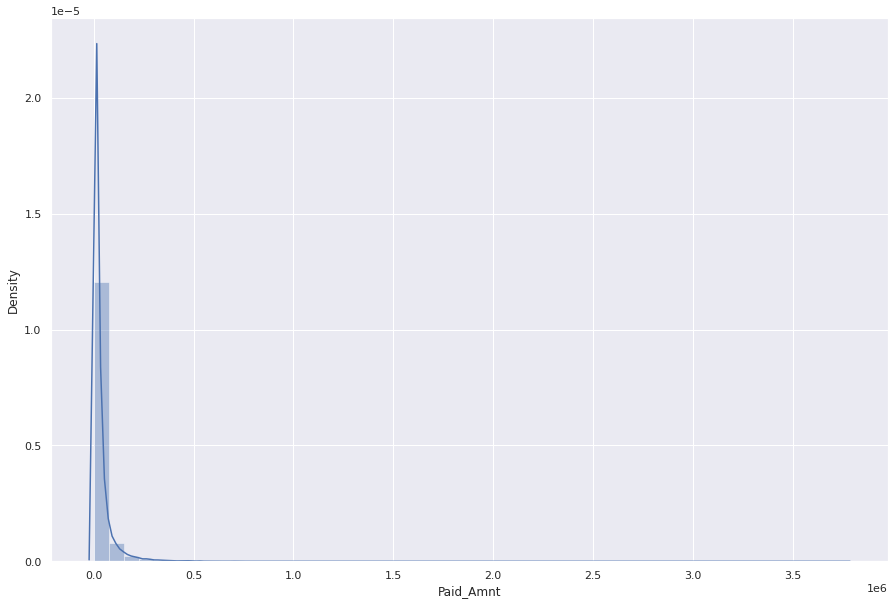

In [ ]:
#sns.distplot(np.log(mod_df['Paid_Amnt']))
sns.distplot(mod_df['Paid_Amnt'])

In [ ]:
mod_df[mod_df['Paid_Amnt'] == 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,DEFAULTER,Bill_Amnt,Paid_Amnt,diff_amnt
18,19,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0,0,0,0
19,20,180000,2,1,2,29,1,-2,-2,-2,-2,-2,0,0,0,0
45,46,210000,1,1,2,29,-2,-2,-2,-2,-2,-2,1,0,0,0
79,80,240000,2,2,2,44,1,-2,-2,-2,-2,-2,1,0,0,0
109,110,360000,1,2,1,35,1,-2,-2,-2,-2,-2,0,-618,0,-618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29973,29974,230000,1,2,1,35,1,-2,-2,-2,-2,-2,1,0,0,0
29979,29980,180000,1,1,1,32,-2,-2,-2,-2,-2,-2,0,0,0,0
29985,29986,240000,1,1,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0
29986,29987,360000,1,1,2,35,-1,-1,-2,-2,-2,-2,0,2220,0,2220


In [ ]:
#one hot encoding

mod_df = pd.get_dummies(mod_df, columns=['SEX' ,'EDUCATION', 'MARRIAGE' , 'PAY_sept',	'PAY_aug',	'PAY_jul'	,'PAY_jun',	'PAY_may',	'PAY_apr'	], prefix=['SEX' ,'EDU', 'Marriage' , 'PAY_sept',	'PAY_aug',	'PAY_jul'	,'PAY_jun',	'PAY_may',	'PAY_apr'] )

In [ ]:
#Transforming using MINMAX scaler
sc = MinMaxScaler()
#mod_df['AGE'] = np.log(df['AGE'])
#mod_df['LIMIT_BAL'] = np.log(df['LIMIT_BAL'])


In [ ]:
X_New = sc.fit_transform(mod_df.drop(['ID','DEFAULTER'], axis=1))
y_New= mod_df['DEFAULTER']

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_New, y_New, test_size=0.25, random_state=42)
lr = LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_pred_new = lr.predict(X_test_new)
accuracy = accuracy_score(y_test_new,y_pred_new)
parameters = lr.coef_

In [ ]:
print(classification_report(y_test_new,y_pred_new,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.34      0.45      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500



In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE_mod, y_train_SMOTE_mod = smt.fit_sample(X_train_new, y_train_new)

lr = LogisticRegression()
lr.fit(X_train_SMOTE_mod, y_train_SMOTE_mod)
y_pred = lr.predict(X_test_new)
accuracy = accuracy_score(y_test_new,y_pred)
parameters = lr.coef_

confusion_matrix(y_test_new,y_pred)


print(classification_report(y_test_new,y_pred,labels=[0,1]))
           

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5873
           1       0.48      0.58      0.53      1627

    accuracy                           0.77      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.77      0.78      7500



In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_SMOTE_mod, y_train_SMOTE_mod)

#Predict the response for test dataset
y_pred = gnb.predict(X_test_new)

In [ ]:
print("Accuracy: ", accuracy_score(y_test_new,y_pred))

Accuracy:  0.8045333333333333


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_SMOTE_mod, y_train_SMOTE_mod)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test_new)

In [ ]:
print("Accuracy: ", accuracy_score(y_test_new,y_pred))

Accuracy:  0.7774666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#X_train_new, X_test_new, y_train_new, y_test_new
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_new,y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train_new)
test_class_preds = rf_clf.predict(X_test_new)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train_new)
test_accuracy_rf = accuracy_score(test_class_preds,y_test_new)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9995555555555555
The accuracy on test data is  0.8108
